# Séance 6 - *correction*

In [1]:
import pandas
import numpy
import matplotlib.pyplot as plt
import seaborn
seaborn.set_style("white")

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

In [2]:
url_spam = "https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data"
spam = pandas.read_csv(url_spam, header = None)

url_names = "https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.names"
spam_names = pandas.read_table(url_names, sep = ":", header = None, skiprows = 33, names = ["var", "type"])

spam.columns = list(spam_names["var"]) + ["spam"]
spam

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


## Modèle complet

In [3]:
X = spam.drop(["spam"], axis = 1)
y = spam["spam"]

m_complet = LogisticRegression(max_iter = 10000).fit(X, y)

### Critères de qualité

#### Matrice de confusion

In [4]:
t = pandas.crosstab(m_complet.predict(X), y)
t

spam,0,1
row_0,,
0,2667,190
1,121,1623


#### $R^2$

In [5]:
m_complet.score(X, y)

0.9324059986959357

#### Courbe ROC et AUC

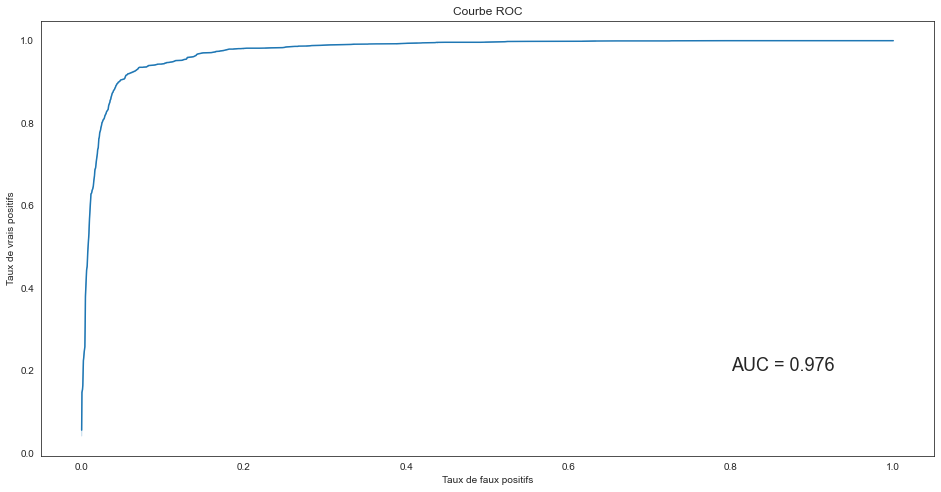

In [6]:
fpr, tpr, th = roc_curve(y, pandas.DataFrame(m_complet.predict_proba(X))[1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize = (16,8))
plt.title("Courbe ROC")
g = seaborn.lineplot(x = fpr, y = tpr)
g.set(xlabel = "Taux de faux positifs", ylabel = "Taux de vrais positifs")
plt.text(.8, .2, "AUC = %0.3f" % roc_auc, fontsize= 18)
plt.show()

#### Courbe Precision/Recall

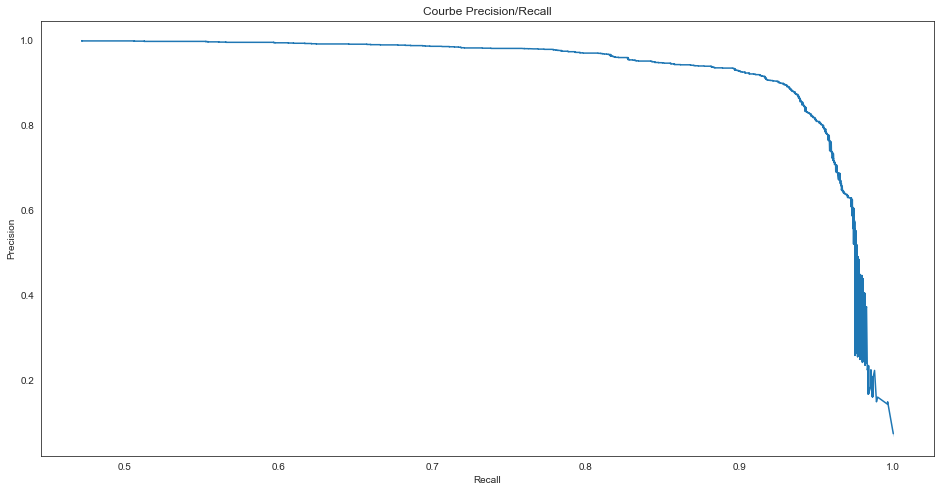

In [7]:
pr, rc, th = precision_recall_curve(y, pandas.DataFrame(m_complet.predict_proba(X))[1])

plt.figure(figsize = (16,8))
plt.title("Courbe Precision/Recall")
g = seaborn.lineplot(x = pr, y = rc)
g.set(xlabel = "Recall", ylabel = "Precision")
plt.show()

### Distribution des probabilités pour chaque classe

In [8]:
probas = pandas.DataFrame(m_complet.predict_proba(X), columns = ["predit:"+str(v) for v in m_complet.classes_])
probas = probas.assign(spam = spam["spam"])
probas = probas.melt(id_vars = "spam")
probas

,spam,variable,value
0,1,predit:0,0.403744
1,1,predit:0,0.024939
2,1,predit:0,0.000016
3,1,predit:0,0.243096
4,1,predit:0,0.243190
...,...,...,...
9197,0,predit:1,0.071107
9198,0,predit:1,0.038502
9199,0,predit:1,0.033631
9200,0,predit:1,0.092682


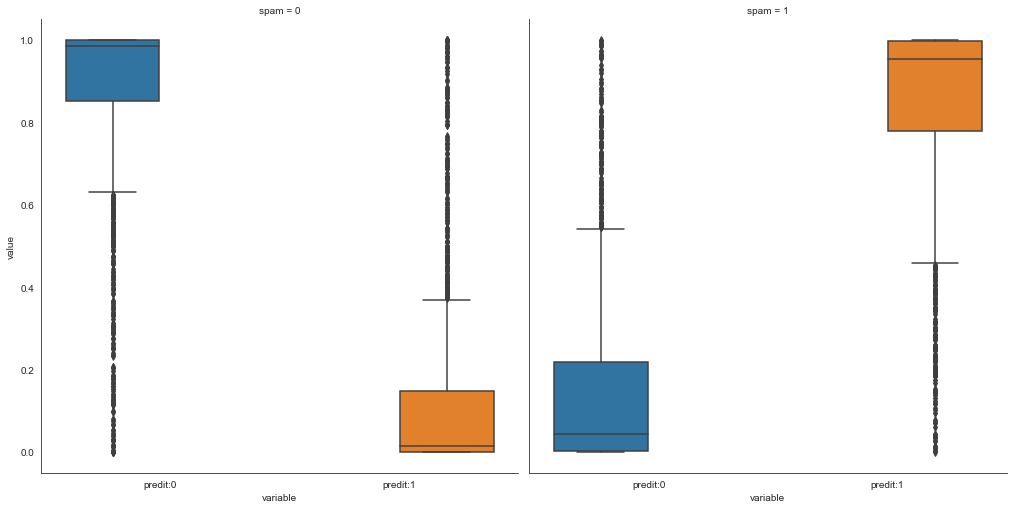

In [9]:
seaborn.catplot(kind = "box", 
                data = probas, x = "variable", y = "value", hue = "variable", col = "spam",
                height = 7)
plt.show()

### Commentaires

Le modèle complet semble très efficace à prédire si un mail est un spam ou non, avec un $R^2$ de 0.93 (qui est la proportion de mails correctement prédits) et une valeur de $AUC$ de 0.976. 

## Modèle avec données *binarisées*

Ici, nous choisissons comme seuil .1.

In [10]:
X_bin = spam[['capital_run_length_average', 'capital_run_length_longest', 'capital_run_length_total']]
for v in spam.columns[[any(c[0:4] == cc for cc in ["word", "char"]) for c in spam.columns]]:
    test = spam[[v]] > 0.1
    test.columns = test.columns + "_bin"
    X_bin = pandas.concat([X_bin, test], axis = 1)
X_bin

,capital_run_length_average,capital_run_length_longest,capital_run_length_total,word_freq_make_bin,word_freq_address_bin,word_freq_all_bin,word_freq_3d_bin,word_freq_our_bin,word_freq_over_bin,word_freq_remove_bin,...,word_freq_re_bin,word_freq_edu_bin,word_freq_table_bin,word_freq_conference_bin,char_freq_;_bin,char_freq_(_bin,char_freq_[_bin,char_freq_!_bin,char_freq_$_bin,char_freq_#_bin
0,3.756,61,278,False,True,True,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
1,5.114,101,1028,True,True,True,False,True,True,True,...,False,False,False,False,False,True,False,True,True,False
2,9.821,485,2259,False,False,True,False,True,True,True,...,False,False,False,False,False,True,False,True,True,False
3,3.537,40,191,False,False,False,False,True,False,True,...,False,False,False,False,False,True,False,True,False,False
4,3.537,40,191,False,False,False,False,True,False,True,...,False,False,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,1.142,3,88,True,False,True,False,False,True,False,...,True,True,False,False,False,True,False,False,False,False
4597,1.555,4,14,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,True,False,False
4598,1.404,6,118,True,False,True,False,False,False,False,...,False,True,False,False,True,True,False,False,False,False
4599,1.147,5,78,True,False,False,False,True,False,False,...,False,True,False,False,False,False,False,False,False,False


In [11]:
m_binaire = LogisticRegression(max_iter = 10000).fit(X_bin, y)

### Critères de qualité

#### Matrice de confusion

In [12]:
pandas.crosstab(m_binaire.predict(X_bin), y)

spam,0,1
row_0,,
0,2676,170
1,112,1643


#### $R^2$

In [13]:
m_binaire.score(X_bin, y)

0.9387089763094979

#### Courbe ROC et AUC

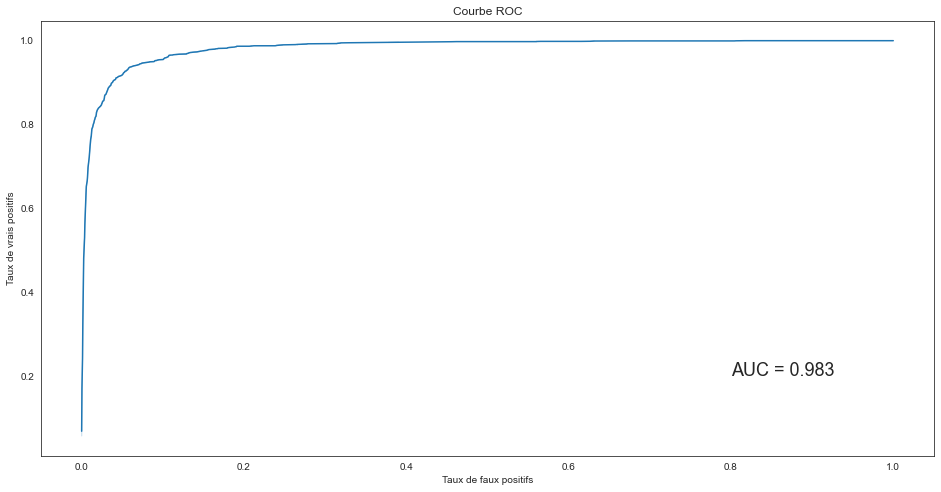

In [14]:
fpr, tpr, th = roc_curve(y, pandas.DataFrame(m_binaire.predict_proba(X_bin))[1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize = (16,8))
plt.title("Courbe ROC")
g = seaborn.lineplot(x = fpr, y = tpr)
g.set(xlabel = "Taux de faux positifs", ylabel = "Taux de vrais positifs")
plt.text(.8, .2, "AUC = %0.3f" % roc_auc, fontsize= 18)
plt.show()

#### Courbe Precision/Recall

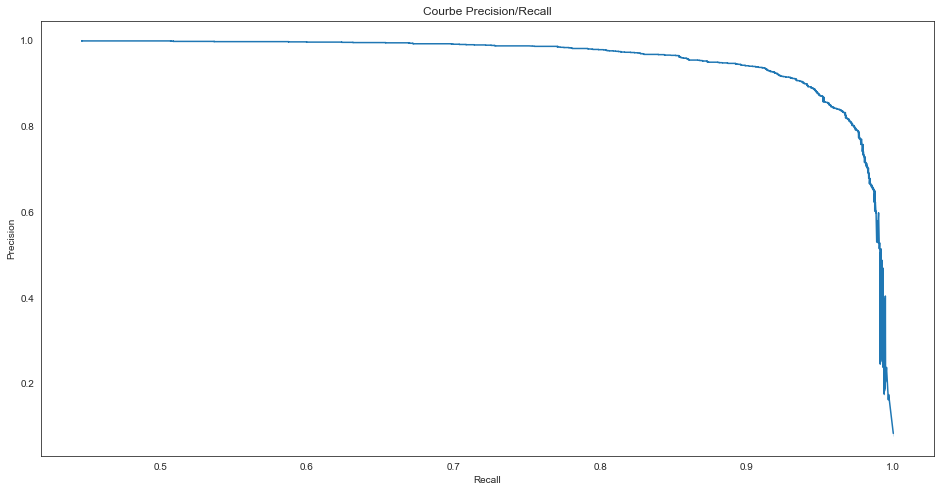

In [15]:
pr, rc, th = precision_recall_curve(y, pandas.DataFrame(m_binaire.predict_proba(X_bin))[1])

plt.figure(figsize = (16,8))
plt.title("Courbe Precision/Recall")
g = seaborn.lineplot(x = pr, y = rc)
g.set(xlabel = "Recall", ylabel = "Precision")
plt.show()

### Commentaires

Le modèle avec les variables binarisées (*i.e.* transformées en variable binaire) est plus performant encore, avec des valeurs de $R^2$ de 0.94 et de $AUC$ de 0.983. Cette transformation est donc particulièrement intéressante pour ce cas.

## Modèles à une variable

In [16]:
X_tout = pandas.concat([X, X_bin.drop(columns = X_bin.columns[:3])], axis = 1)
X_tout

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_re_bin,word_freq_edu_bin,word_freq_table_bin,word_freq_conference_bin,char_freq_;_bin,char_freq_(_bin,char_freq_[_bin,char_freq_!_bin,char_freq_$_bin,char_freq_#_bin
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,False,False,False,False,False,False,False,True,False,False
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,False,False,False,False,False,True,False,True,True,False
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,False,False,False,False,False,True,False,True,True,False
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,False,False,False,False,False,True,False,True,False,False
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,False,False,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,True,True,False,False,False,True,False,False,False,False
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,False,True,False,False,False,False,False,True,False,False
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,False,True,False,False,True,True,False,False,False,False
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,False,True,False,False,False,False,False,False,False,False


In [17]:
r2 = []
roc_auc = []
vn = []
fn = []
fp = []
vp = []

for v in X_tout.columns:
    X_seul = X_tout[[v]]
    m_simple = LogisticRegression().fit(X_seul, y)
    r2 = r2 + [m_simple.score(X_seul, y)]
    fpr, tpr, th = roc_curve(y, pandas.DataFrame(m_simple.predict_proba(X_seul))[1])
    roc_auc = roc_auc + [auc(fpr, tpr)]
    p = m_simple.predict(X_seul)
    vn = vn + [sum((1 - y) * (1 - p))]
    fn = fn + [sum((1 - y) * p)]
    fp = fp + [sum(y * (1 - p))]
    vp = vp + [sum(y * p)]

df = pandas.DataFrame({
    "variable": X_tout.columns,
    "rsquared": r2,
    "auc": roc_auc,
    "vrais_negatifs": vn,
    "faux_negatifs": fn,
    "faux_positifs": fp,
    "vrais_positifs": vp
})
df

,variable,rsquared,auc,vrais_negatifs,faux_negatifs,faux_positifs,vrais_positifs
0,word_freq_make,0.615953,0.604632,2673,115,1652,161
1,word_freq_address,0.605955,0.378399,2788,0,1813,0
2,word_freq_all,0.618344,0.675314,2551,237,1519,294
3,word_freq_3d,0.612041,0.509340,2785,3,1782,31
4,word_freq_our,0.664638,0.710932,2580,208,1335,478
...,...,...,...,...,...,...,...
106,char_freq_(_bin,0.605955,0.540887,2788,0,1813,0
107,char_freq_[_bin,0.605955,0.520712,2788,0,1813,0
108,char_freq_!_bin,0.789394,0.781083,2287,501,468,1345
109,char_freq_$_bin,0.775049,0.722952,2701,87,948,865


#### TOP10 des variables, en se basant sur $R^2$

In [18]:
df.sort_values(by = ["rsquared"], ascending=False).head(10).round(2)

,variable,rsquared,auc,vrais_negatifs,faux_negatifs,faux_positifs,vrais_positifs
108,char_freq_!_bin,0.79,0.78,2287,501,468,1345
52,char_freq_$,0.78,0.77,2695,93,927,886
109,char_freq_$_bin,0.78,0.72,2701,87,948,865
72,word_freq_free_bin,0.76,0.72,2575,213,878,935
51,char_freq_!,0.74,0.83,2624,164,1029,784
63,word_freq_remove_bin,0.74,0.67,2748,40,1163,650
6,word_freq_remove,0.74,0.70,2748,40,1172,641
55,capital_run_length_longest,0.73,0.80,2567,221,1042,771
80,word_freq_money_bin,0.72,0.65,2744,44,1228,585
23,word_freq_money,0.72,0.68,2746,42,1241,572


#### TOP10 des variables, en se basant sur $AUC$

In [19]:
df.sort_values(by = ["auc"], ascending=False).head(10).round(2)

,variable,rsquared,auc,vrais_negatifs,faux_negatifs,faux_positifs,vrais_positifs
51,char_freq_!,0.74,0.83,2624,164,1029,784
55,capital_run_length_longest,0.73,0.80,2567,221,1042,771
54,capital_run_length_average,0.72,0.79,2596,192,1106,707
108,char_freq_!_bin,0.79,0.78,2287,501,468,1345
20,word_freq_your,0.72,0.78,2478,310,998,815
52,char_freq_$,0.78,0.77,2695,93,927,886
56,capital_run_length_total,0.66,0.76,2583,205,1353,460
77,word_freq_your_bin,0.72,0.74,1858,930,355,1458
15,word_freq_free,0.72,0.73,2663,125,1186,627
109,char_freq_$_bin,0.78,0.72,2701,87,948,865


### Commentaires

En se basant sur $R^2$, c'est la présence ou non du caractère `"!"` qui permet de mieux prédire le fait qu'un mail soit un spam ou non, avec un score de 0.079. Avec l'$AUC$, on obtient la même variable, mais en valeur brute.

Cela veut dire que dans presue 80% des cas, il est possible de prédire si un mail est un spam en se basant uniquement sur la présence (importante) de point d'interrogations.